## PART I: Importing, cleaning and structuring the data

Project description:

The aim of this project is to investigate the development over time in China's Foreign Direct Investment (FDI)
on the African continent. To do this we utilize data from the publically available datasets provided by the
China-Africa Research Initiative by the Johns Hopkins School of Advanced International Studies. 
The data is available at: http://www.sais-cari.org




In [201]:
# Importing packages

import numpy as np
import pandas as pd 
import pandas_datareader
from pandas_datareader import wb 
import datetime
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive
import os


In [202]:
#Checking where our current working directory is
os.getcwd()

#change the working directory
os.chdir("C:/Users/zts735/Dropbox (Personal)/4.4 INTRO NUM/Data project")

In [203]:
# Scraping data from www.sais-cari.org on China's FDI outflows using the requests package

import requests

url = "http://www.sais-cari.org/s/FDIData_04Mar2019.xlsx"
r = requests.get(url)

with open('China_Africa.xlsx', "wb") as f:
    f.write(r.content)


In [204]:
# Change the format of our data to a Pandas DataFrame
ChAfr = pd.read_excel('China_Africa.xlsx', skiprows=1)

# Printing first 20 observations in order to see data structure
ChAfr.head(20)

,"US$ mn, unadjusted",Regional,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Cape Verde,...,Tanzania,Togo,Tunisia,Uganda,Western Sahara,Zambia,Zimbabwe,Unnamed: 58,"Total, US$ mn","Total, US$ bn"
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
2,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
3,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
4,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
5,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
6,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
7,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
8,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
9,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN


In [205]:
# Drop all rows with missing values only

#Subset dataframe: observations where column Total US$ mn is greater than zero
ChAfr = ChAfr[ChAfr['Total, US$ mn']>0]

ChAfr=ChAfr.dropna(axis=1)

# Print first 15 entries to investigate data again
ChAfr.head(15)
# Looks better!

,"US$ mn, unadjusted",Regional,Algeria,Angola,Benin,Botswana,Burundi,Cameroon,Cape Verde,CAR,...,South Africa,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,"Total, US$ mn","Total, US$ bn"
13,2003,0.0,5.70,0.30,7.71,2.10,0.00,5.73,0.00,0.00,...,44.77,0.55,7.46,4.73,1.56,1.33,143.70,36.74,491.23,0.49123
14,2004,0.0,34.49,0.47,20.51,3.80,0.02,6.98,0.01,0.00,...,58.87,171.61,53.80,6.24,1.28,0.23,147.75,38.06,899.56,0.89956
15,2005,0.0,171.21,8.79,19.00,18.12,0.00,7.87,0.60,2.00,...,112.28,351.53,62.02,4.78,2.15,4.97,160.31,41.63,1595.23,1.59523
16,2006,0.0,247.37,37.23,22.12,25.52,1.65,16.46,1.65,3.98,...,167.62,497.13,111.93,11.72,3.91,14.67,267.86,46.15,2556.82,2.55682
17,2007,0.0,393.89,78.46,35.60,43.39,1.65,18.51,4.65,3.98,...,702.37,574.85,110.92,14.42,3.57,18.68,429.36,59.15,4461.83,4.46183
18,2008,0.0,508.82,68.89,53.15,65.26,1.65,20.34,5.13,3.98,...,3048.62,528.25,190.22,23.12,3.57,11.98,651.33,60.01,7803.84,7.80384
19,2009,0.0,751.26,195.54,54.01,119.25,4.64,25.05,5.04,16.71,...,2306.86,563.89,281.79,33.02,2.27,58.56,843.97,99.75,9332.27,9.33227
20,2010,0.0,937.26,351.77,39.33,178.52,6.51,59.61,4.58,46.54,...,4152.98,613.36,307.51,58.11,2.53,113.68,943.73,134.54,13042.12,13.04212
21,2011,0.0,1059.45,400.59,40.03,200.38,7.20,61.54,4.58,51.02,...,4059.73,1525.64,407.07,67.15,6.29,126.21,1199.84,576.44,16244.32,16.24432
22,2012,0.0,1305.33,1245.10,47.60,220.15,8.70,79.50,11.60,51.02,...,4775.07,1236.60,540.80,98.38,5.69,141.10,1998.11,874.67,21729.71,21.72971


In [206]:
ChAfr.tail()

,"US$ mn, unadjusted",Regional,Algeria,Angola,Benin,Botswana,Burundi,Cameroon,Cape Verde,CAR,...,South Africa,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,"Total, US$ mn","Total, US$ bn"
23,2013,0.0,1497.21,1634.74,49.91,230.90,9.79,148.40,15.23,60.38,...,4400.40,1507.04,716.46,123.09,13.86,383.76,2164.32,1520.83,26185.77,26.18577
24,2014,0.0,2451.57,1214.04,69.17,262.13,13.24,177.84,15.18,57.08,...,5954.02,1747.12,885.18,135.81,14.56,464.10,2271.99,1695.58,32350.07,32.35007
25,2015,0.0,2531.55,1268.29,87.31,321.08,12.37,207.34,15.18,46.22,...,4722.97,1809.36,1138.87,128.82,20.84,722.15,2338.02,1798.92,34694.40,34.69440
26,2016,0.0,2552.48,1633.21,102.51,437.50,12.42,366.74,15.23,35.61,...,6500.84,1104.34,1191.99,118.57,16.30,1006.47,2687.16,1839.00,39877.47,39.87747
27,2017,0.0,1833.66,2260.16,104.37,296.87,10.29,424.36,14.63,16.12,...,7472.77,1201.56,1280.30,112.85,15.08,575.94,2963.44,1748.34,43296.49,43.29649


In [207]:
#Drop missing values along axis 0 (rows)
ChAfr=ChAfr.dropna(axis=0)
ChAfr.head()

,"US$ mn, unadjusted",Regional,Algeria,Angola,Benin,Botswana,Burundi,Cameroon,Cape Verde,CAR,...,South Africa,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,"Total, US$ mn","Total, US$ bn"
13,2003,0.0,5.70,0.30,7.71,2.10,0.00,5.73,0.00,0.00,...,44.77,0.55,7.46,4.73,1.56,1.33,143.70,36.74,491.23,0.49123
14,2004,0.0,34.49,0.47,20.51,3.80,0.02,6.98,0.01,0.00,...,58.87,171.61,53.80,6.24,1.28,0.23,147.75,38.06,899.56,0.89956
15,2005,0.0,171.21,8.79,19.00,18.12,0.00,7.87,0.60,2.00,...,112.28,351.53,62.02,4.78,2.15,4.97,160.31,41.63,1595.23,1.59523
16,2006,0.0,247.37,37.23,22.12,25.52,1.65,16.46,1.65,3.98,...,167.62,497.13,111.93,11.72,3.91,14.67,267.86,46.15,2556.82,2.55682
17,2007,0.0,393.89,78.46,35.60,43.39,1.65,18.51,4.65,3.98,...,702.37,574.85,110.92,14.42,3.57,18.68,429.36,59.15,4461.83,4.46183


In [208]:
#Drop variables with only missing/zero observations - we have one such variable: Regional
drop = ['Regional']

ChAfr.drop(drop, axis=1, inplace=True)


In [209]:
ChAfr.tail(35)

,"US$ mn, unadjusted",Algeria,Angola,Benin,Botswana,Burundi,Cameroon,Cape Verde,CAR,Chad,...,South Africa,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,"Total, US$ mn","Total, US$ bn"
13,2003,5.70,0.30,7.71,2.10,0.00,5.73,0.00,0.00,0.00,...,44.77,0.55,7.46,4.73,1.56,1.33,143.70,36.74,491.23,0.49123
14,2004,34.49,0.47,20.51,3.80,0.02,6.98,0.01,0.00,0.00,...,58.87,171.61,53.80,6.24,1.28,0.23,147.75,38.06,899.56,0.89956
15,2005,171.21,8.79,19.00,18.12,0.00,7.87,0.60,2.00,2.71,...,112.28,351.53,62.02,4.78,2.15,4.97,160.31,41.63,1595.23,1.59523
16,2006,247.37,37.23,22.12,25.52,1.65,16.46,1.65,3.98,12.78,...,167.62,497.13,111.93,11.72,3.91,14.67,267.86,46.15,2556.82,2.55682
17,2007,393.89,78.46,35.60,43.39,1.65,18.51,4.65,3.98,13.53,...,702.37,574.85,110.92,14.42,3.57,18.68,429.36,59.15,4461.83,4.46183
18,2008,508.82,68.89,53.15,65.26,1.65,20.34,5.13,3.98,25.36,...,3048.62,528.25,190.22,23.12,3.57,11.98,651.33,60.01,7803.84,7.80384
19,2009,751.26,195.54,54.01,119.25,4.64,25.05,5.04,16.71,76.57,...,2306.86,563.89,281.79,33.02,2.27,58.56,843.97,99.75,9332.27,9.33227
20,2010,937.26,351.77,39.33,178.52,6.51,59.61,4.58,46.54,80.00,...,4152.98,613.36,307.51,58.11,2.53,113.68,943.73,134.54,13042.12,13.04212
21,2011,1059.45,400.59,40.03,200.38,7.20,61.54,4.58,51.02,108.12,...,4059.73,1525.64,407.07,67.15,6.29,126.21,1199.84,576.44,16244.32,16.24432
22,2012,1305.33,1245.10,47.60,220.15,8.70,79.50,11.60,51.02,194.12,...,4775.07,1236.60,540.80,98.38,5.69,141.10,1998.11,874.67,21729.71,21.72971


In [210]:
# Renaming column

ChAfr=ChAfr.rename(columns={'US$ mn, unadjusted':'Year'}) # the data structure initially had multiple indexes and
                                                          # year ended up being named 'US$ mn, unadjusted'

In [211]:
ChAfr.head(20)

,Year,Algeria,Angola,Benin,Botswana,Burundi,Cameroon,Cape Verde,CAR,Chad,...,South Africa,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,"Total, US$ mn","Total, US$ bn"
13,2003,5.70,0.30,7.71,2.10,0.00,5.73,0.00,0.00,0.00,...,44.77,0.55,7.46,4.73,1.56,1.33,143.70,36.74,491.23,0.49123
14,2004,34.49,0.47,20.51,3.80,0.02,6.98,0.01,0.00,0.00,...,58.87,171.61,53.80,6.24,1.28,0.23,147.75,38.06,899.56,0.89956
15,2005,171.21,8.79,19.00,18.12,0.00,7.87,0.60,2.00,2.71,...,112.28,351.53,62.02,4.78,2.15,4.97,160.31,41.63,1595.23,1.59523
16,2006,247.37,37.23,22.12,25.52,1.65,16.46,1.65,3.98,12.78,...,167.62,497.13,111.93,11.72,3.91,14.67,267.86,46.15,2556.82,2.55682
17,2007,393.89,78.46,35.60,43.39,1.65,18.51,4.65,3.98,13.53,...,702.37,574.85,110.92,14.42,3.57,18.68,429.36,59.15,4461.83,4.46183
18,2008,508.82,68.89,53.15,65.26,1.65,20.34,5.13,3.98,25.36,...,3048.62,528.25,190.22,23.12,3.57,11.98,651.33,60.01,7803.84,7.80384
19,2009,751.26,195.54,54.01,119.25,4.64,25.05,5.04,16.71,76.57,...,2306.86,563.89,281.79,33.02,2.27,58.56,843.97,99.75,9332.27,9.33227
20,2010,937.26,351.77,39.33,178.52,6.51,59.61,4.58,46.54,80.00,...,4152.98,613.36,307.51,58.11,2.53,113.68,943.73,134.54,13042.12,13.04212
21,2011,1059.45,400.59,40.03,200.38,7.20,61.54,4.58,51.02,108.12,...,4059.73,1525.64,407.07,67.15,6.29,126.21,1199.84,576.44,16244.32,16.24432
22,2012,1305.33,1245.10,47.60,220.15,8.70,79.50,11.60,51.02,194.12,...,4775.07,1236.60,540.80,98.38,5.69,141.10,1998.11,874.67,21729.71,21.72971


In [212]:
# Extracting totals from rest of dataset in order to merge these back on as 
# additional variables after the main dataset has been reshaped to a 
# panel structure

Total = ChAfr.loc[:,['Year','Total, US$ mn', 'Total, US$ bn']]
#ChAfr = ChAfr[ChAfr['Total, US$ mn']>0]
#Total

In [213]:
# Drop all columns that are not countries, save for later to merge back onto panel data frame
drop = ['Total, US$ mn', 'Total, US$ bn']
values = ChAfr.drop(drop, axis=1, inplace=True)

In [214]:
ChAfr.shape

(15, 51)

In [215]:
# Using pd.melt to transform dataset to panel structure

ChAfr_panel = pd.melt(ChAfr, id_vars=['Year'], var_name='Country', value_name='FDI (US$ mn)')
ChAfr_panel.head()

,Year,Country,FDI (US$ mn)
0,2003,Algeria,5.70
1,2004,Algeria,34.49
2,2005,Algeria,171.21
3,2006,Algeria,247.37
4,2007,Algeria,393.89


In [216]:
# Merging back totals (FDI in $) on year which is our key here, such that we have them as new variables (columns)

FDI = pd.merge(ChAfr_panel, Total, on='Year', how='left')

## PART II : VISUALIZING THE DATA

This next part of our data project presents descriptive statistics in text and in figures.

In [217]:
# Descriptive statistics for entire dataset

np.round(FDI.describe(), 2)

,FDI (US$ mn),"Total, US$ mn","Total, US$ bn"
count,750.00,750.00,750.00
mean,339.16,16970.74,16.97
std,755.56,14535.11,14.54
min,0.00,491.23,0.49
25%,10.23,2556.82,2.56
50%,60.30,13042.12,13.04
75%,285.84,32350.07,32.35
max,7472.77,43296.49,43.30


The above table of summary statistics tells us that not all countries in the sample recieve FDI from
China (min = 0.00). The mean FDI inflow in the period is 339.16 mn USD, while the median is substantially
lower, at 60.30 mn USD. This tells us that a few African countries receive the lion's share of FDI.

The two right-most columns are identical. The only difference is the unit of measurement, with FDI denoted
either in millions or billions of USD. 

In [218]:
# Descriptive statistics for each country

FDI.groupby(['Country']).describe()

FDI (US$ mn)                                             \
                           count         mean          std     min      25%   
Country                                                                       
Algeria                     15.0  1085.416667   911.867952    5.70  320.630   
Angola                      15.0   693.172000   765.707150    0.30   53.060   
Benin                       15.0    50.155333    29.666406    7.71   28.860   
Botswana                    15.0   161.664667   134.820920    2.10   34.455   
Burundi                     15.0     6.008667     4.945023    0.00    1.650   
CAR                         15.0    26.309333    23.736903    0.00    3.980   
Cameroon                    15.0   108.418000   133.727129    5.73   17.485   
Cape Verde                  15.0     7.552667     6.188135    0.00    3.115   
Chad                        15.0   164.711333   174.962808    0.00   13.155   
Comoros                     15.0     3.434000     1.788167    0.00    4.040   
Congo, Dem. Rep.            15.0  1128.277333  1382.719940    0.24   71.005   
Congo, Rep.                 15.0   386.858000   431.244417    0.00   64.150   
Cote d'Ivoire               15.0    65.360000    80.241877    8.05   26.610   
Djibouti                    15.0    36.638000    63.736048    0.00    1.100   
Egypt                       15.0   364.736000   297.506953   14.28  115.890   
Equatorial Guinea           15.0   142.360667   137.197778    8.64   35.530   
Eritrea                     15.0    72.573333   106.590293    0.12    6.680   
Ethiopia                    15.0   590.069333   665.259769    4.78  102.240   
Gabon                       15.0   133.476000   100.912695   24.05   53.435   
Ghana                       15.0   532.688667   649.546171    6.31   24.980   
Guinea                      15.0   173.908667   146.913976   14.34   62.300   
Guinea-Bissau               15.0    67.766000   170.115688    0.00    0.000   
Kenya                       15.0   438.684000   492.075211   25.53   56.690   
Lesotho                     15.0     6.936000     3.679376    0.03    6.580   
Liberia                     15.0   124.241333   114.657545    5.80   29.645   
Libya                       15.0    88.334667    93.432333    0.86   32.625   
Madagascar                  15.0   226.678667   188.663778   28.13   65.175   
Malawi                      15.0    97.130000   123.178562    0.72    1.060   
Mali                        15.0   151.149333   147.697150   12.09   25.390   
Mauritania                  15.0    71.244667    71.307117    1.82   17.630   
Mauritius                   15.0   462.998667   415.682162   12.59   83.530   
Morocco                     15.0    84.174000    82.404344    4.31   27.535   
Mozambique                  15.0   282.762667   329.837081    2.42   24.460   
Namibia                     15.0   195.514000   281.763177    0.72    6.835   
Niger                       15.0   244.386000   216.678312   12.50   79.160   
Nigeria                     15.0  1313.014000   994.882744   31.98  423.130   
Rwanda                      15.0    49.015333    42.504138    3.30    7.505   
Sao Tome & Principe         15.0     0.193333     0.188591    0.00    0.000   
Senegal                     15.0    63.218667    67.312557    2.35    4.270   
Seychelles                  15.0    67.192667    85.824772    0.42    6.505   
Sierra Leone                15.0    76.210000    69.960957    0.00   25.365   
South Africa                15.0  3232.011333  2538.562602   44.77  434.995   
Sudan                       15.0   895.522000   585.045895    0.55  512.690   
Tanzania                    15.0   485.754667   448.368325    7.46  111.425   
The Gambia                  15.0     1.508667     1.341528    0.04    1.190   
Togo                        15.0    62.720667    51.820198    4.73   13.070   
Tunisia                     15.0     7.564000     6.580546    1.28    2.400   
Uganda                      15.0   242.922000   315.844472    0.23   1

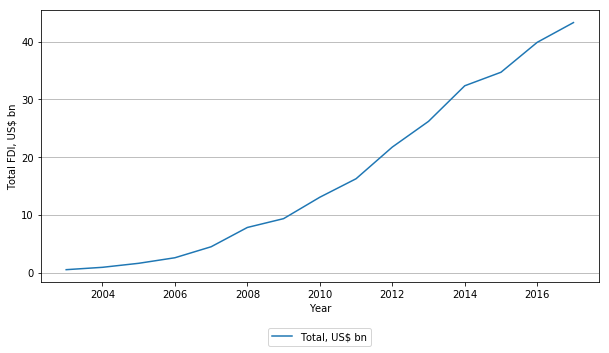

In [219]:
# Create time series plot of total FDI outflows

# 1. we create an empty figure
fig = plt.figure(figsize=(10,5))

# 2. add a subplot of total FDI outflows and fill figure with content
ax = plt.subplot(111)
Total.plot('Year','Total, US$ bn', kind='line', legend=True, ax=ax)

# 3. Make our graph readable and nicer-looking
ax.set_ylabel('Total FDI, US$ bn') # y-axis labels
ax.yaxis.grid(True) # set gridlines for y-axis only
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=1); # placement of legend to be below figure

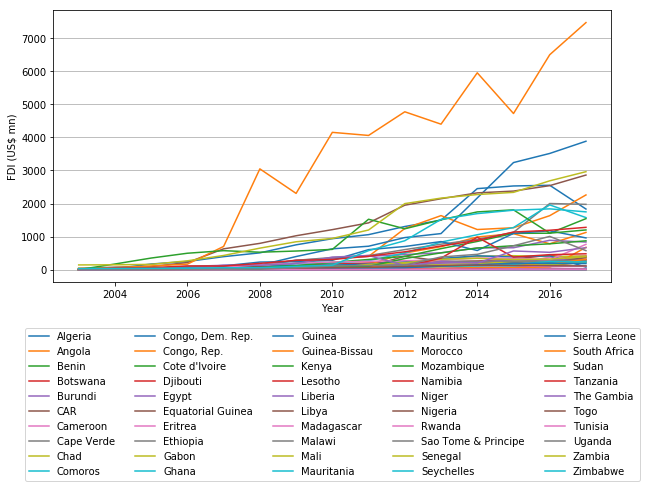

In [221]:
# Create the same time series plot for each country

# 1. we create an empty figure
fig = plt.figure(figsize=(10,5))

# 2. add a subplot of total FDI outflows and fill figure with content
ax = plt.subplot(111)
FDI.set_index('Year').groupby('Country')['FDI (US$ mn)'].plot(kind='line', legend=False, ax=ax)

# 3. Make our graph nicer-looking
ax.set_ylabel('FDI (US$ mn)') # y-axis labels
ax.yaxis.grid(True) # set gridlines for y-axis only
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5); # placement of legend to be below figure


In [222]:
def plot_e(FDI, Country): 
    I = FDI['Country'] == Country
    
    ax=FDI.loc[I,:].plot(x='Year', y='FDI (US$ mn)', style='-', legend='True')  
    

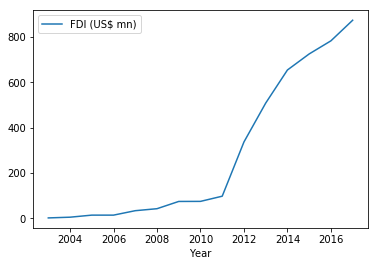

In [223]:
widgets.interact(plot_e, 
    FDI = widgets.fixed(FDI),
    Country = widgets.Dropdown(description='Country', options=FDI.Country.unique(), value='Mozambique')
); 

The above figure is near-impossible to read, but does give us an impression
about some general trends in the development of China's FDI outflows to African countries 
over the period 2003 - 2017. Until 2006 all countries recieved low if any FDI from
China. Since 2006 there are considerable differences in how much FDI a country
recieves. South Africa (uppermost orange line) has recieved a lot of FDI, though
the figure tells us nothing about the relative size of FDI inflows to e.g. GDP.

The below figure presents the average annual FDI inflows from China during
2003 - 2017 by country. The aim is to make it clearer which countries recieve
a lot of FDI from China.


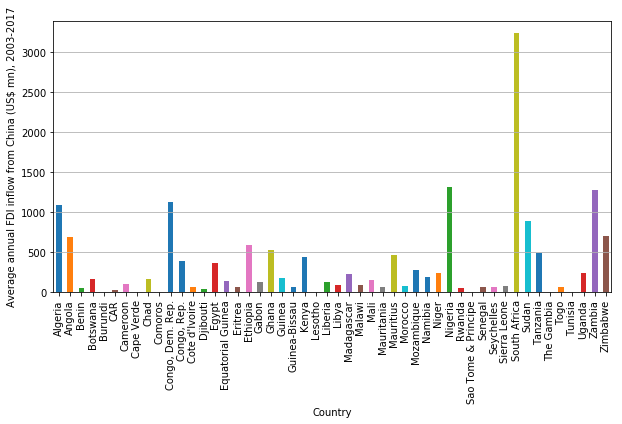

In [224]:
# 1. We rename our FDI variable (could and probably should have done this 
#    earlier) to get rid of spacing 
FDI=FDI.rename(columns={'FDI (US$ mn)':'FDI_USD_mn'}) #renaming
FDI.head() #checking that we did it correctly

# 2. Creating a figure of average annual rates of FDI inflow per country
ax = FDI.groupby('Country').FDI_USD_mn.mean().plot(kind='bar',figsize=(10,5))
ax.set_ylabel('Average annual FDI inflow from China (US$ mn), 2003-2017')
ax.yaxis.grid(True) # set gridlines for y-axis only

From the figure above we can see that China's FDI outflows to Africa is concentrated to
quite few countries. 11 countries recieved an average of 0.5 billion USD or more in FDI, while
only 5 countries recieved an average annual FDI inflow of 1 billion USD or more. From the two
first time series figures, showing total FDI outflow from China to Africa and the development
in FDI for the individual countries we know that large inflows of FDI from China is a relatively
new phenomenon. The average over the period will thus be affected the increase in Chinese FDI
since 2006.

Next, we create a figure that allows for choosing an individual country. The goal was to have all
countries figure in a dropdown menu. That did not succeed. Instead, FDI inflows from China can be
plotted for the desired country by changing the "value=Country" option in the last line of code in 
the next cell.

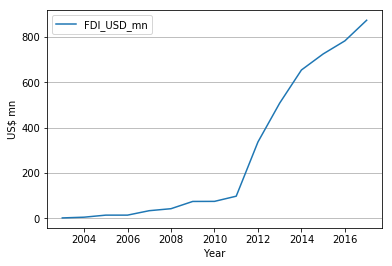

In [225]:
def plot_e(FDI, Country): 
    I = FDI['Country'] == Country
    
    ax=FDI.loc[I,:].plot(x='Year', y='FDI_USD_mn', style='-', legend='True') 
    ax.set_ylabel('US$ mn')
    ax.yaxis.grid(True)
    
widgets.interact(plot_e, 
    FDI = widgets.fixed(FDI),
    Country = widgets.Dropdown(description='Country', options=FDI.Country.unique(), value='Mozambique') #select country
);

Finally, we take a closer look at how China distributes its total FDI across the African continent.
We do this by first calculating each country's share of total FDI and then present the result in 
a couple of figures.

In [226]:
# Share of total FDI inflows

FDI['FDI_fraction'] = FDI['FDI_USD_mn'] / FDI['Total, US$ mn'] # add a new variable 'FDI_fraction' which is the
                                                               # fraction of total FDI received per year

In [227]:
FDI.head(15) # Checking that we did the calculation correctly


,Year,Country,FDI_USD_mn,"Total, US$ mn","Total, US$ bn",FDI_fraction
0,2003,Algeria,5.70,491.23,0.49123,0.011604
1,2004,Algeria,34.49,899.56,0.89956,0.038341
2,2005,Algeria,171.21,1595.23,1.59523,0.107326
3,2006,Algeria,247.37,2556.82,2.55682,0.096749
4,2007,Algeria,393.89,4461.83,4.46183,0.088280
5,2008,Algeria,508.82,7803.84,7.80384,0.065201
6,2009,Algeria,751.26,9332.27,9.33227,0.080501
7,2010,Algeria,937.26,13042.12,13.04212,0.071864
8,2011,Algeria,1059.45,16244.32,16.24432,0.065220
9,2012,Algeria,1305.33,21729.71,21.72971,0.060071


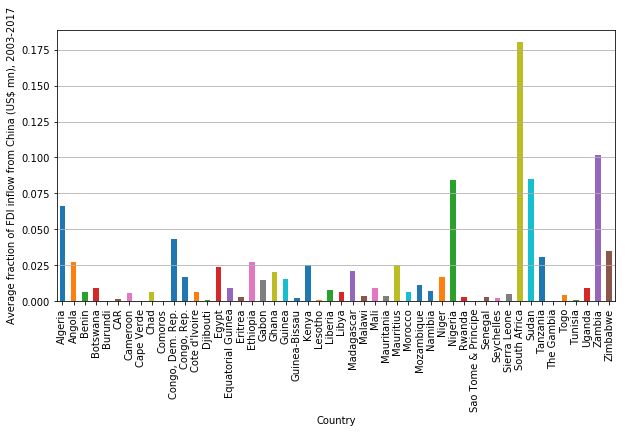

In [228]:
# 2. Creating a figure of the fraction of total FDI received on average in 2003-2017
ax = FDI.groupby('Country').FDI_fraction.mean().plot(kind='bar',figsize=(10,5))
ax.set_ylabel('Average fraction of FDI inflow from China (US$ mn), 2003-2017')
ax.yaxis.grid(True) # set gridlines for y-axis only

The above figure shows that China concentrates its FDI outflows to a few countries.
South Africa alone has received approximately 18 percent of FDI in the period 2003-2017. 
There are however, again, huge variations across time and across individual countries. 

Next, we create a somewhat interactive plot (no dropdown menu) for each country's share
of FDI inflow over time. This reveals that South Africa's large share of FDI when 
considering the entire period is due to the fact that the country received 40 percent
of China's total FDI outflows to Africa in 2008. In 2009 South Africa received a quarter
of all of Chinese FDI to Africa, and in 2010 it was more than 30 percent. 

Conversely, Angola has received only 2.5 percent of total Chinese FDI over the period
2003-2017 (on average), but the share of FDI to Angola has risen from practically 0 in 
2004 to 6 percent in 2013. After a small decline in 2014, the share of Chinese FDI to
Angola has again risen from 2015-2017. 

This very heterogeneous spread of FDI across countries indicates varying and shifting
Chinese interests in individual countries across the African continent.

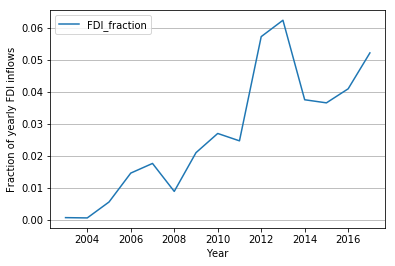

In [231]:
# We make a plot for each country individually. The desired country can be chosen
# by changing the value 'Angola' to e.g. 'South Africa' in the last line of code in
# this cell.

def plot_frac(FDI, Country): 
    I = FDI['Country'] == Country
    
    ax=FDI.loc[I,:].plot(x='Year', y='FDI_fraction', style='-', legend='True') 
    ax.set_ylabel('Fraction of yearly FDI inflows')
    ax.yaxis.grid(True)
    
widgets.interact(plot_frac, 
    FDI = widgets.fixed(FDI),
    Country = widgets.Dropdown(description='Country', options=FDI.Country.unique(), value='Angola') #select country
);